<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S7_C1_balance_de_clases_inicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [ ]:
# 1. Generación de Datos Artificiales
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.9, 0.1])
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

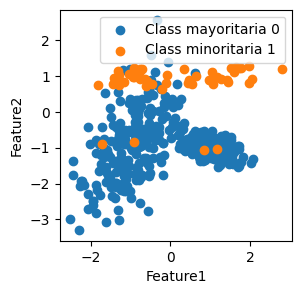

In [ ]:
# plt.scatter(df[df['Class'] == 0]['Feature1'], df[df['Class'] == 0]['Feature2'], label='Class 0')
plt.figure(figsize=(3, 3))
plt.scatter(df[df['Class'] == 0]['Feature1'], df[df['Class'] == 0]['Feature2'], label='Class mayoritaria 0')
plt.scatter(df[df['Class'] == 1]['Feature1'], df[df['Class'] == 1]['Feature2'], label='Class minoritaria 1')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()



http://eio.usc.es/pub/mte/descargas/proyectosfinmaster/proyecto_1469.pdf

# Parte 2. Oversampling : [SMOTE](https://imbalanced-learn.org/stable/over_sampling.html)

aumenta la varianza

In [ ]:
smote = SMOTE(sampling_strategy= 0.67, random_state= 42)
X_om, y_om = smote.fit_resample(X,y)

**sampling_strategy**= 0.67 hace que la proporcion de la clase minoritaria (la que se incrementa) sea aproximadamente 40% de los datos

Class
0    446
1    298
Name: count, dtype: int64


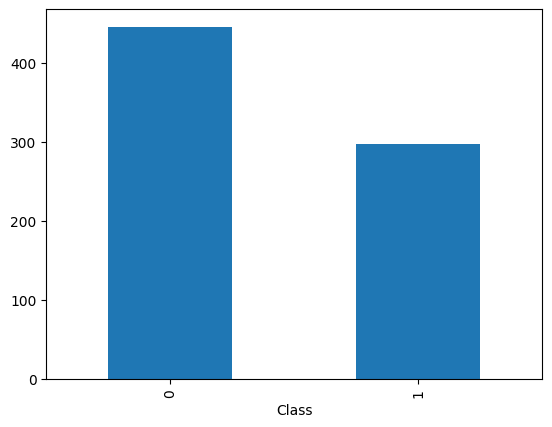

In [ ]:
df_m = pd.DataFrame(X_om, columns=['Feature1', 'Feature2'])
df_m['Class'] = y_om
print(df_m['Class'].value_counts())
df_m['Class'].value_counts().plot(kind='bar')
df_om = df_m

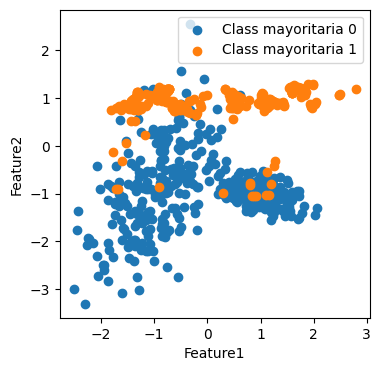

In [ ]:
df_graf = df_om

plt.figure(figsize=(4, 4))
plt.scatter(df_graf[df_graf['Class'] == 0]['Feature1'], df_graf[df_graf['Class'] == 0]['Feature2'], label='Class mayoritaria 0')
plt.scatter(df_graf[df_graf['Class'] == 1]['Feature1'], df_graf[df_graf['Class'] == 1]['Feature2'], label='Class mayoritaria 1')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()


# Parte 3. Undersample: RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy=0.67, random_state=42)
#undersampler = RandomUnderSampler()
X_um, y_um = undersampler.fit_resample(X, y)

Class
0    80
1    54
Name: count, dtype: int64


<Axes: xlabel='Class'>

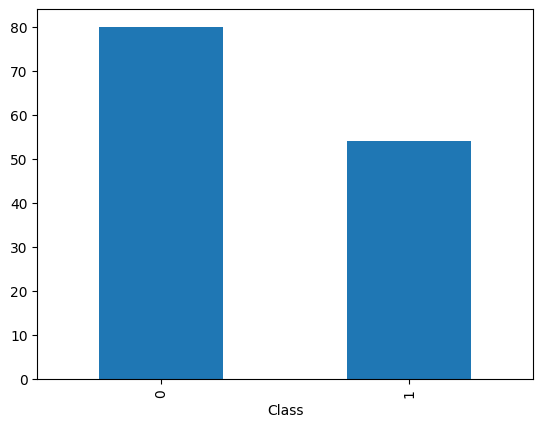

In [ ]:
df_um = pd.DataFrame(X_um, columns=['Feature1', 'Feature2'])
df_um['Class'] = y_um
print(df_um['Class'].value_counts())
df_um['Class'].value_counts().plot(kind='bar')

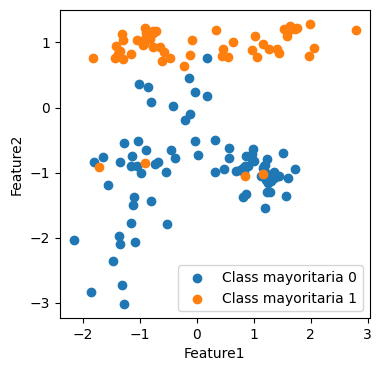

In [ ]:
df_graf = df_um

plt.figure(figsize=(4, 4))
plt.scatter(df_graf[df_graf['Class'] == 0]['Feature1'], df_graf[df_graf['Class'] == 0]['Feature2'], label='Class mayoritaria 0')
plt.scatter(df_graf[df_graf['Class'] == 1]['Feature1'], df_graf[df_graf['Class'] == 1]['Feature2'], label='Class mayoritaria 1')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Parte 4. Entrenar clasificadores
* **Raw Data** (Datos crudos - Originales) := df
* **Oversampling** Data := df_om
* **Undersampling** Data := df_um

Modelos
1. Árbol de desición := model_tree
2. Regresion Logística := model_Reglog
3. A elección

Métricas

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* AUC

## 4.1 Split: train_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_om, X_test_om, y_train_om, y_test_om = train_test_split(X_om, y_om, test_size=0.2, random_state=42)
X_train_um, X_test_um, y_train_um, y_test_um = train_test_split(X_um, y_um, test_size=0.2, random_state=42)

## 4.2 Defini, entrenar y predecir de los modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

### 4.2.1 model_tree

In [ ]:
# Crear el modelo de árbol de decisión
model_tree = DecisionTreeClassifier()

# Entrenar el modelo
tree_raw = model_tree.fit(X_train, y_train)
tree_om = model_tree.fit(X_train_om, y_train_om)
tree_um = model_tree.fit(X_train_um, y_train_um)

In [ ]:
y_predict_raw = tree_raw.predict(X_test)
y_predict_om = tree_om.predict(X_test_om)
y_predict_um = tree_um.predict(X_test_um)


4.2.2 model_Reglog

## 4.3 Medición del desempeño del modelo
con variaciones del tamaño del dataset y con técnicas de balance clases

In [ ]:
def metricas(modelo,y_test, y_predict):
  print(f'Metricas del modelo {modelo}')
  print("Accuracy:", accuracy_score(y_test, y_predict))
  print("Precision:", precision_score(y_test, y_predict))
  print("Recall:", recall_score(y_test, y_predict))
  print("F1 Score:", f1_score(y_test, y_predict))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
  print("AUC:", roc_auc_score(y_test, y_predict))
  print("Classification Report:\n", classification_report(y_test, y_predict))

In [ ]:
metricas('Datos Originales', y_test, y_predict_raw)
metricas('Datos sobremuestreo - SMOTE', y_test_om, y_predict_om)
metricas('Datos submuestreado', y_test_um, y_predict_um)

Metricas del modelo Datos Originales
Accuracy: 0.89
Precision: 0.47619047619047616
Recall: 1.0
F1 Score: 0.6451612903225806
Confusion Matrix:
 [[79 11]
 [ 0 10]]
AUC: 0.9388888888888889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        90
           1       0.48      1.00      0.65        10

    accuracy                           0.89       100
   macro avg       0.74      0.94      0.79       100
weighted avg       0.95      0.89      0.91       100

Metricas del modelo Datos sobremuestreo - SMOTE
Accuracy: 0.912751677852349
Precision: 0.8253968253968254
Recall: 0.9629629629629629
F1 Score: 0.8888888888888888
Confusion Matrix:
 [[84 11]
 [ 2 52]]
AUC: 0.9235867446393761
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        95
           1       0.83      0.96      0.89        54

    accuracy                           0.91       1

In [ ]:
metricas('Datos Originales', y_test, y_predict_raw)
metricas('Datos sobremuestreo - SMOTE', y_test_om, y_predict_om)
metricas('Datos submuestreado', y_test_um, y_predict_um)